In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def display(img, cmap = "gray"):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = "gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'while True:\n    \n    ret, frame = cap.read()\n    \n    success, roi = tracker.update(frame)\n    \n    #roi variable is a tuple of 4 floats\n    #We nee each value and we need them as integers\n    (x,y,w,h) = tuple(map(int,roi))\n    \n    #Draw rectangle as tracker moves\n    if success:\n        pt1 = (x,y)\n        pt2 = (x+w, y+h)\n        cv2.rectangle(frame, pt1, pt2, 255, 3)\n    else:\n        #Tracking failure\n        cv2.putText(frame, text = "Failure to detect tracking!!", org = (100,200), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0,0,255), thickness = 3)\n        \n    #Display tracker type on frame\n    cv2.putText(frame, tracker_name, (20,400), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0,255,0), thickness = 3)\n    \n    cv2.imshow(tracker_name, frame)\n    \n    k = cv2.waitKey(1)\n    if k == 27:\n        break\n        \ncap.release()\ncv2.destroyAllWindows()'

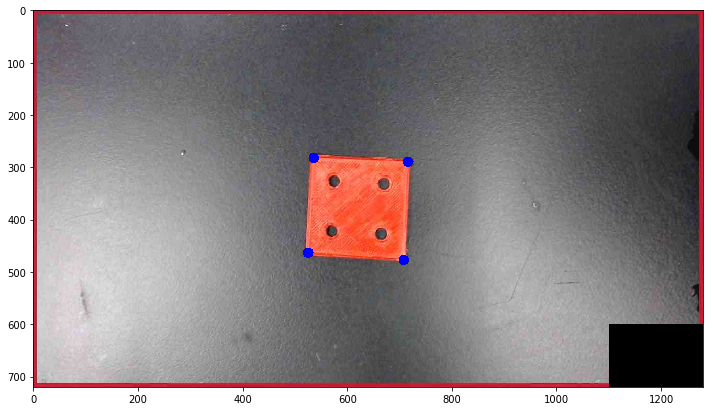

In [21]:
"""cap = cv2.VideoCapture(1)

tracker = cv2.TrackerKCF_create()
tracker_name = "TrackerKCF"

ret, img = cap.read()"""

img = cv2.imread("C:/Users/jprr2/Videos/Logitech/LogiCapture/cuadro_rojo.jpg").astype(np.float32)/255
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fix_img[600:720, 1100:1280, :] = 0

kernel = np.ones(shape = (7,7), dtype = np.uint8)

dark_img = np.power(fix_img, 7)
closing = cv2.morphologyEx(dark_img[:,:,0], cv2.MORPH_CLOSE, kernel)*255

ret, thresh_img = cv2.threshold(closing, 180,255, cv2.THRESH_BINARY)

corners = cv2.goodFeaturesToTrack(thresh_img, maxCorners = 4, qualityLevel = 0.8, minDistance = 9, blockSize = 9)
corners = np.uint0(corners)

#roi = fix_img[corners[0][0][1]:corners[2][0][1], corners[0][0][0]:corners[2][0][0]]

for i in corners:
    x, y = i.ravel()
    cv2.circle(fix_img, (x,y), radius = 10, color = (0,0,255), thickness = -1)

display(fix_img)
"""while True:
    
    ret, frame = cap.read()
    
    success, roi = tracker.update(frame)
    
    #roi variable is a tuple of 4 floats
    #We nee each value and we need them as integers
    (x,y,w,h) = tuple(map(int,roi))
    
    #Draw rectangle as tracker moves
    if success:
        pt1 = (x,y)
        pt2 = (x+w, y+h)
        cv2.rectangle(frame, pt1, pt2, 255, 3)
    else:
        #Tracking failure
        cv2.putText(frame, text = "Failure to detect tracking!!", org = (100,200), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0,0,255), thickness = 3)
        
    #Display tracker type on frame
    cv2.putText(frame, tracker_name, (20,400), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0,255,0), thickness = 3)
    
    cv2.imshow(tracker_name, frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()"""